# Coding Part: Utilized Datasets

**Genel Plan**:
1. 2010-2013(10-20 arasi cok uzun oldugu icin gercekci degerler vermeyebilirdi bu yuzden 3 yila kisalttik) arası unique nba oyuncu listesi ve statları 
2. unique isimler yılların ortalaması performans örn 2010 2013 arası shaq overall efficiency 
3. unique isimler yılların ortalaması performans örn 2010 2013 arası shaq ofansif efficiency 
4. drafta göre oyuncuları 1-5 en üst, 5-15 ikinci lig gibi liglere ayrılması


**Önemli Not**: Eğer daha öncesinde hücreler içinde yazılan bir kodu, başka bir hücrede güncellediysen; hangi hücredeki kodu neden ve nasıl güncellendiğini yorum olarak hücrenin en üstüne yaz

**Konu ile ilgli Notlar:**
* NBA Standard Efficiency Formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
* Offensive Efficiency Formula: True Shooting Percentage, Effective Field goal percantage, Offensive rebound percantage

**Yapılacak:**
* Offensive efficiency ve standard efficiency arasında belirli bir değer bulunacak, bu değerin belirli bir miktar altında veya üstünde olanlar offensive efficiency'si iyi veya kötü olarak sınıflandırılacak.

* Utilized Datasets bar chart grafikleri çıkar
* ? (Sonra bakılacak)

* Data Exploration 
Barchart grafiği x ekseni oyuncular y ekseni standard efficiency ve offensive efficiency (3 yıl için ayrı ayrı)
* 5 tane oyuncu belirleyip 3 yıllık ortalamalrı alınacak, sonrası üstekinin aynısı


**Yapıldı:**
* Belirlenen 3 yil icin draft picki ilk iki de olan oyuncularin barh chart halinde ayri ayri overall ve ofansif statlarini gosterecegiz.
* Daha sonra 3 yilda da var olan 5 oyuncu belirleyip bu oyuncularin 3 yillik ortalamalarini alacagiz bu sayede bu 5 oyuncunun 3 yillik overall ve onfansif statlarinin ortalamalarini bir grafik halinde gorup daha iyi yorumlayabilecegiz.

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

# displaying option
pd.set_option('max_rows', 10)

%matplotlib inline

In [ ]:
# Display the dataFrame
file_name = "players_stats_by_season_full_details.csv"

df = pd.read_csv(join(path_prefix, file_name))
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3:00 PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [ ]:
"""
Explanation: Column name which is named 3PM is transformed to 3:00 PM by software system of computer automatically. 
Since 3:00 PM column name is irrelevant, the name of the column is changed as 3_PM for preventing naming problems
"""

def transfer_3PM(row):
  current_data = row["3:00 PM"]
  return current_data

df["3_PM"] = df.apply(transfer_3PM, axis = 1)

df.drop("3:00 PM", axis = 1, inplace = True)
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,3_PM
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic,0
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors,95
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz,2
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers,89
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics,177


In [ ]:
# League NBA olmayan, 2010'dan öncesini ve gereksiz olan özellikleri at!
#df.drop()
# 2010 - 2011 ve 2011 - 2012 ile 


"""
Explanation: Columns which are related are extracted
"""
def IsValid2011(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2010 - 2011" and stage == "Regular_Season":
    return "valid"
  return None

def IsValid2012(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2011 - 2012" and stage == "Regular_Season":
    return "valid"
  return None  

def IsValid2013(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2012 - 2013" and stage == "Regular_Season":
    return "valid"
  return None

def IsInTen(row):
  draft_round = row["draft_round"]
  draft_pick = row["draft_pick"]

  if draft_round == 1 and draft_pick <= 2:
    return "inTen"
  
  return None

#df
df_2011 = df.copy()
df_2012 = df.copy()
df_2013 = df.copy()

# 2011
df_2011["valid"] = df_2011.apply(IsValid2011, axis = 1)
df_2011.dropna(inplace = True)

#df # Debuging
df_2011.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2011.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2011["inTen"] = df_2011.apply(IsInTen, axis = 1)
df_2011.dropna(inplace = True)
df_2011.drop("inTen", axis = 1, inplace = True)
#df.head(10)

# 2012
df_2012["valid"] = df_2012.apply(IsValid2012, axis = 1)
df_2012.dropna(inplace = True)

#df # Debuging
df_2012.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2012.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2012["inTen"] = df_2012.apply(IsInTen, axis = 1)
df_2012.dropna(inplace = True)
df_2012.drop("inTen", axis = 1, inplace = True)


# 2013
df_2013["valid"] = df_2013.apply(IsValid2013, axis = 1)
df_2013.dropna(inplace = True)

#df # Debuging
df_2013.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2013.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2013["inTen"] = df_2013.apply(IsInTen, axis = 1)
df_2013.dropna(inplace = True)
df_2013.drop("inTen", axis = 1, inplace = True)

df_2011.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM
11849,NBA,2010 - 2011,Kevin Durant,OKC,78,711,1538,414,594,675,218,57,533,214,88,76,2161,1.0,2.0,Seattle SuperSonics,145
11850,NBA,2010 - 2011,LeBron James,MIA,79,758,1484,279,503,663,284,80,590,554,124,50,2111,1.0,1.0,Cleveland Cavaliers,92
11852,NBA,2010 - 2011,Derrick Rose,CHI,81,711,1597,385,476,555,278,81,330,623,85,51,2026,1.0,1.0,Chicago Bulls,128


In [ ]:
df_2012.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM
14704,NBA,2011 - 2012,Kevin Durant,OKC,66,643,1297,344,431,501,248,40,527,231,88,77,1850,1.0,2.0,Seattle SuperSonics,133
14705,NBA,2011 - 2012,LeBron James,MIA,62,621,1169,149,387,502,213,94,492,387,115,50,1683,1.0,1.0,Cleveland Cavaliers,54
14709,NBA,2011 - 2012,Blake Griffin,LAC,66,561,1022,16,244,468,150,218,717,210,54,48,1368,1.0,1.0,Los Angeles Clippers,2


In [ ]:
df_2013.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM
18717,NBA,2012 - 2013,Kevin Durant,OKC,81,731,1433,334,679,750,280,46,640,374,116,105,2280,1.0,2.0,Seattle SuperSonics,139
18719,NBA,2012 - 2013,LeBron James,MIA,76,765,1354,254,403,535,226,97,610,551,129,67,2036,1.0,1.0,Cleveland Cavaliers,103
18726,NBA,2012 - 2013,LaMarcus Aldridge,POR,74,638,1318,14,282,348,143,175,670,192,62,91,1560,1.0,2.0,Chicago Bulls,2


In [ ]:
#d=np.array(data)        

#drugs=np.unique(d[:,0])
#side_effects=np.unique(d[:,3])

"""
2010 - 2011 Kevin 
2011 - 2012 Kevin
2012 - 2013 - Kevin
"""

# Ana Yol: Unique playerlarin statlarini cikarmak icin belirli bi yil disindaki statlarini droplamamiz gerek 3 yildan ornek alirsak 2010-2013 yillari arasindaki statlar disindakileri,
#nba disindakileri ve stat olmayan columnlar droplandiktan sonra her oyuncunun 3 farkli yil icin statlarini bir dataframe de toplamis olucaz ondan sonra bu ucer yilin ortalamasi alinacak ve 
#her oyuncunun unique 3 yillik overall statlarina sahip olucaz)

# Alternatif yol: dictionary kullanabilir

unique_players_array = df.Player.unique()
print("number of unique players:", len(unique_players_array))
unique_players_array
#dfplayer = pd.DataFrame(unique_players_array)
#dfplayer
#groups = df.groupby(by = "Player")
#groups.head(5)

number of unique players: 14582


array(["Shaquille O'Neal", 'Vince Carter', 'Karl Malone', ...,
       'Kyrylo Meshheryakov', 'Yaroslav Kadygrob', 'Andrij Shapovalov'],
      dtype=object)

# Coding Part: Data Exploration

In [ ]:
#NBA Standard Efficiency Formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
#Offensive Efficiency Formula: True Shooting Percentage, Effective Field goal percantage, Offensive rebound percantage
#True Shooting Percentage = PTS/(2(FGA+(0.44*FTA))
#Effective Field goal percantage: (FGM + 0.5 * 3PM) / FGA
#Offensive rebound percantage: (ORB / REB) * 100


# st_eff: standard efficiency
# League	Season	Player	Team	GP	FGM	FGA	3PA	FTM	FTA	TOV	ORB	REB	AST	STL	BLK	PTS	draft_round	draft_pick	draft_team



def findStandardEfficiency(row):
  point = row["PTS"]
  rebound = row["REB"]
  assist = row["AST"]
  steal = row["STL"]
  block = row["BLK"]
  missed_fg = row["FGA"] - row["FGM"]
  missed_ft = row["FTA"] - row["FTM"]
  turnover = row["TOV"]
  game_played = row["GP"]

  standard_efficiency = (point + rebound + assist + steal + block - missed_fg - missed_ft - turnover) / game_played
  return standard_efficiency

def findOffensiveEfficiency(row):
  field_goal_attempt = row["FGA"]
  free_throw_attempt = row["FTA"]
  point = row["PTS"]
  assist = row["AST"]
  offensive_rebound = row["ORB"]
  turnover = row["TOV"]

  true_shooting_percentage = point / (2 * (field_goal_attempt + (0.44 * free_throw_attempt)))
    


  possession_for_player = field_goal_attempt - offensive_rebound + turnover + (0.4 * free_throw_attempt)
  offensive_efficiency = (point + assist) / possession_for_player
  offensive_data = offensive_efficiency * 15 # to get meaningful_data
  return offensive_data


df_2011["st_eff"] = df_2011.apply(findStandardEfficiency, axis = 1)
df_2011.head(3)

df_2011["off_eff"] = df_2011.apply(findOffensiveEfficiency, axis = 1)
df_2011.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
11849,NBA,2010 - 2011,Kevin Durant,OKC,78,711,1538,414,594,675,218,57,533,214,88,76,2161,1.0,2.0,Seattle SuperSonics,145,24.948718,18.092941
11850,NBA,2010 - 2011,LeBron James,MIA,79,758,1484,279,503,663,284,80,590,554,124,50,2111,1.0,1.0,Cleveland Cavaliers,92,28.594937,20.466414
11852,NBA,2010 - 2011,Derrick Rose,CHI,81,711,1597,385,476,555,278,81,330,623,85,51,2026,1.0,1.0,Chicago Bulls,128,23.111111,19.709821


In [ ]:
#st_eff and off_eff columns added to year 2012
df_2012["st_eff"] = df_2012.apply(findStandardEfficiency, axis = 1)
df_2012.head(3)

df_2012["off_eff"] = df_2012.apply(findOffensiveEfficiency, axis = 1)
df_2012.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
14704,NBA,2011 - 2012,Kevin Durant,OKC,66,643,1297,344,431,501,248,40,527,231,88,77,1850,1.0,2.0,Seattle SuperSonics,133,27.287879,18.303624
14705,NBA,2011 - 2012,LeBron James,MIA,62,621,1169,149,387,502,213,94,492,387,115,50,1683,1.0,1.0,Cleveland Cavaliers,54,29.854839,20.855723
14709,NBA,2011 - 2012,Blake Griffin,LAC,66,561,1022,16,244,468,150,218,717,210,54,48,1368,1.0,1.0,Los Angeles Clippers,2,23.666667,20.741325


In [ ]:
#st_eff and off_eff columns added to year 2013
df_2013["st_eff"] = df_2013.apply(findStandardEfficiency, axis = 1)
df_2013.head(3)

df_2013["off_eff"] = df_2013.apply(findOffensiveEfficiency, axis = 1)
df_2013.head(3)

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
18717,NBA,2012 - 2013,Kevin Durant,OKC,81,731,1433,334,679,750,280,46,640,374,116,105,2280,1.0,2.0,Seattle SuperSonics,139,30.395062,20.238943
18719,NBA,2012 - 2013,LeBron James,MIA,76,765,1354,254,403,535,226,97,610,551,129,67,2036,1.0,1.0,Cleveland Cavaliers,103,32.184211,22.866824
18726,NBA,2012 - 2013,LaMarcus Aldridge,POR,74,638,1318,14,282,348,143,175,670,192,62,91,1560,1.0,2.0,Chicago Bulls,2,22.783784,18.439517


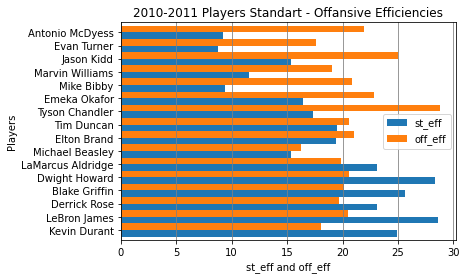

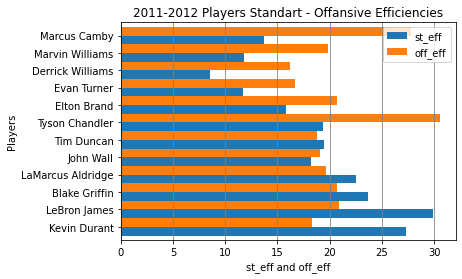

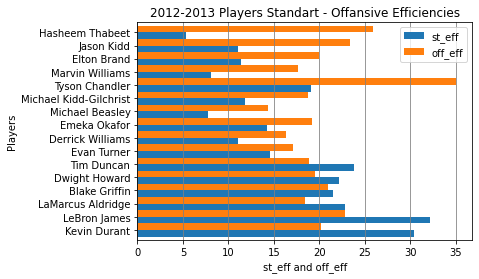

In [ ]:
# Barh Chart Graph for 2010 - 2011

stf_2011_arr = df_2011.iloc[:, 1:]["st_eff"].values
off_2011_arr = df_2011.iloc[:, 1:]["off_eff"].values
player_2011_arr = df_2011.iloc[:, 1:]["Player"].values
st_of_2011_df = pd.DataFrame({"st_eff": stf_2011_arr,
                              "off_eff": off_2011_arr}, index = player_2011_arr)

chart_2011 = st_of_2011_df.plot.barh( width=1, title ="2010-2011 Players Standart - Offansive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2011.set_xlabel("st_eff and off_eff")
chart_2011.set_ylabel("Players")


# Barh Chart Graph for 2011 - 2012

stf_2012_arr = df_2012.iloc[:, 1:]["st_eff"].values
off_2012_arr = df_2012.iloc[:, 1:]["off_eff"].values
player_2012_arr = df_2012.iloc[:, 1:]["Player"].values
st_of_2012_df = pd.DataFrame({"st_eff": stf_2012_arr,
                              "off_eff": off_2012_arr}, index = player_2012_arr)

chart_2012 = st_of_2012_df.plot.barh( width=1, title ="2011-2012 Players Standart - Offansive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2012.set_xlabel("st_eff and off_eff")
chart_2012.set_ylabel("Players")


# Barh Chart Graph for 2012 - 2013

stf_2013_arr = df_2013.iloc[:, 1:]["st_eff"].values
off_2013_arr = df_2013.iloc[:, 1:]["off_eff"].values
player_2013_arr = df_2013.iloc[:, 1:]["Player"].values
st_of_2013_df = pd.DataFrame({"st_eff": stf_2013_arr,
                              "off_eff": off_2013_arr}, index = player_2013_arr)

chart_2013 = st_of_2013_df.plot.barh( width=1, title ="2012-2013 Players Standart - Offansive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2013.set_xlabel("st_eff and off_eff")
chart_2013.set_ylabel("Players"); # ; added for removing meaningless writting at the top

In [ ]:
#Bu 5 ismin 3 yillik her biri icin st_eff ortalamalarini ve off_eff ortalamalarini alip bir ->
# -> 3 yillik ortalama grafigi olusturmamiz gerek.

#(LeBron James 2011(st_eff=28.594937 off_eff=20.466414), Kevin Durant(st_eff=24.948718 off_eff=18.092941), Blake Griffin(st_eff=25.634146 off_eff=20.133790), Tim Duncan(st_eff=19.539474 off_eff=20.558290), Elton Brand(st_eff=19.395062 off_eff=21.017606))

#(LeBron James 2012(st_eff=29.854839 off_eff=20.855723), Kevin Durant(st_eff=27.287879 off_eff=18.303624), Blake Griffin(st_eff=23.666667	off_eff=20.741325), Tim Duncan(st_eff=19.448276 off_eff=18.795754), Elton Brand(st_eff=15.833333 off_eff=20.716113))

#(LeBron James 2013(st_eff=32.184211 off_eff=22.866824), Kevin Durant(st_eff=30.395062 off_eff=20.238943), Blake Griffin(st_eff=21.537500 off_eff=21.012566), Tim Duncan(st_eff=23.797101 off_eff=18.914209), Elton Brand(st_eff=11.416667 off_eff=19.945726))

In [ ]:
stf_2011_arr = df_2011.iloc[:, 1:]["st_eff"].values
off_2011_arr = df_2011.iloc[:, 1:]["off_eff"].values
player_2011_arr = df_2011.iloc[:, 1:]["Player"].values
#print(player_2011_arr)
#print(stf_2011_arr)

#number_of_players = len(player_2011_arr)
#print(number_of_players)
"""
for fruit, price in zip(fruits, prices):
  print(fruit, price)
"""

# 2011
#list(zip(fruits, prices))
tuple_2011 = list(zip(player_2011_arr, stf_2011_arr, off_2011_arr))
"""
for player, stf, off in tuple_2011:
  print(player, stf, off)
"""
# 2012
tuple_2012 = list(zip(player_2012_arr, stf_2012_arr, off_2012_arr))
"""
for player, stf, off in tuple_2012:
  print(player, stf, off)
"""
#2013
tuple_2013 = list(zip(player_2013_arr, stf_2013_arr, off_2013_arr))
"""
for player, stf, off in tuple_2013:
  print(player, stf, off)
"""


"""
for player, stf, off in tuple_2011:
  #print(player, stf, off)
  if player != "LeBron James" and player != "Kevin Durant" and player != "Blake Griffin" 
    and player != "Tim Duncan" and player != "Elton Brand":
"""    

#print(tuple_list[0][0])

def findWantedPlayers(tuple_list, number_of_players):
  current_tuple_list = []
  tuple_list = list(tuple_list)
  for i in range(number_of_players):
      player = tuple_list[i][0]
      if player == "LeBron James" or player == "Kevin Durant" or player == "Blake Griffin" or player == "Tim Duncan" or player == "Elton Brand":
        #current_tuple_list.remove(tuple_list[i])
        current_tuple_list.append(tuple_list[i])

  return current_tuple_list

new_list_2011 = findWantedPlayers(tuple_2011, len(player_2011_arr))
new_tuple_2011 = list(tuple(new_list_2011))
new_list_2012 = findWantedPlayers(tuple_2012, len(player_2012_arr))
new_tuple_2012 = list(tuple(new_list_2012))
new_list_2013 = findWantedPlayers(tuple_2013, len(player_2013_arr))
new_tuple_2013 = list(tuple(new_list_2013))
#print(new_tupple_2011)

print(len(new_tuple_2011))
print()
print(len(new_tuple_2012))
print()
print(len(new_tuple_2013))
print()
print(new_tuple_2011)
print()
print(new_tuple_2012)
print()
print(new_tuple_2013)

5

5

5

[('Kevin Durant', 24.94871794871795, 18.0929405789741), ('LeBron James', 28.59493670886076, 20.466414089698954), ('Blake Griffin', 25.634146341463413, 20.133789670192908), ('Elton Brand', 19.395061728395063, 21.017606371829803), ('Tim Duncan', 19.539473684210527, 20.558290445289778)]

[('Kevin Durant', 27.28787878787879, 18.303623783276652), ('LeBron James', 29.85483870967742, 20.855722729715207), ('Blake Griffin', 23.666666666666668, 20.741324921135643), ('Tim Duncan', 19.448275862068964, 18.79575402635432), ('Elton Brand', 15.833333333333334, 20.71611253196931)]

[('Kevin Durant', 30.395061728395063, 20.238942552109812), ('LeBron James', 32.18421052631579, 22.86682380671774), ('Blake Griffin', 21.5375, 21.01256645722571), ('Tim Duncan', 23.797101449275363, 18.9142091152815), ('Elton Brand', 11.416666666666666, 19.94572591587517)]


In [ ]:
'''
def get_top_5_list(position):
  #if position == 1:
  player_index = 1
  wanted_stats_list = []
  while player_index < 3:
    for feature_index in range(5): # iterate through each feature
      wanted_stats_list.append((new_tuple_2011[feature_index][player_index] + new_tuple_2012[feature_index][player_index] + new_tuple_2013[feature_index][player_index]) / 3)
    player_index += 1

st_index = 1 # store index of standard efficeny
off_index = 2  # store index of offensive efficency
st_eff_list = get_top_5_list(1)
off_eff_list = get_top_5_list(2)

print(final_players_list)
'''

'\ndef get_top_5_list(position):\n  #if position == 1:\n  player_index = 1\n  wanted_stats_list = []\n  while player_index < 3:\n    for feature_index in range(5): # iterate through each feature\n      wanted_stats_list.append((new_tuple_2011[feature_index][player_index] + new_tuple_2012[feature_index][player_index] + new_tuple_2013[feature_index][player_index]) / 3)\n    player_index += 1\n\nst_index = 1 # store index of standard efficeny\noff_index = 2  # store index of offensive efficency\nst_eff_list = get_top_5_list(1)\noff_eff_list = get_top_5_list(2)\n\nprint(final_players_list)\n'

In [ ]:
def get_top_5_list(position):
  #if position == 1:
  #player_index = 1
  wanted_stats_list = []
  #while player_index < 3:

  for feature_index in range(5): # iterate through each feature
    wanted_stats_list.append((new_tuple_2011[feature_index][position] + new_tuple_2012[feature_index][position] + new_tuple_2013[feature_index][position]) / 3)
 
  return wanted_stats_list 

st_index = 1 # store index of standard efficeny
off_index = 2  # store index of offensive efficency
st_eff_list = get_top_5_list(1)
off_eff_list = get_top_5_list(2)

#print(final_players_list)
print(st_eff_list)
print()
print(off_eff_list)

[27.543886154997267, 30.21132864828466, 23.61277100271003, 20.880146346579796, 15.596491228070176]

[18.878502304786856, 21.396320208710634, 20.629227016184753, 19.57585650448854, 20.40670963104475]


In [ ]:
#df = DataFrame (your_list,columns=['Column_Name'])

selected_5_players_df = pd.DataFrame(st_eff_list, columns = ["avg_st_eff"])

selected_5_players_df.head(5)

selected_5_player_list = ["LeBron James", "Kevin Durant", "Blake Griffin", "Tim Duncan", "Elton Brand"]
selected_5_players_df = pd.DataFrame({"avg_st_eff": st_eff_list,
                              "avg_off_eff": off_eff_list}, index = selected_5_player_list)
selected_5_players_df.head(5)



,avg_st_eff,avg_off_eff
LeBron James,27.543886,18.878502
Kevin Durant,30.211329,21.396320
Blake Griffin,23.612771,20.629227
Tim Duncan,20.880146,19.575857
Elton Brand,15.596491,20.406710


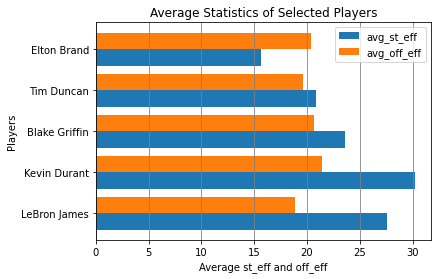

In [ ]:
avg_chart = selected_5_players_df.plot.barh( width=0.8, title ="Average Statistics of Selected Players")
plt.grid(axis="x",color="gray")
avg_chart.set_xlabel("Average st_eff and off_eff")
avg_chart.set_ylabel("Players"); 

# Coding Part: Machine Learning

In [ ]:
def IsInPlace(row):
  draft_round = row["draft_round"]
  draft_pick = row["draft_pick"]

  if draft_round == 1:
    return "inPlace"
  
  return None

def IsValidML(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and stage == "Regular_Season":
    if season == "2010 - 2011":
      return "valid"
    elif season == "2011 - 2012":
      return "valid"
    elif season == "2012 - 2013":
      return "valid"

  return None


df_ML = df.copy()
df_ML["valid"] = df_ML.apply(IsValidML, axis = 1)
df_ML.dropna(inplace = True)
df_ML.Player.unique()


df_ML["st_eff"] = df_ML.apply(findStandardEfficiency, axis = 1)
df_ML.head(3)

df_ML["off_eff"] = df_ML.apply(findOffensiveEfficiency, axis = 1)
df_ML.head(3)


df_ML.drop(["League", "Season", "Team", "GP","FGM", "FGA", "3PA", "FTM", "FTA", "TOV", "ORB", "REB", "AST", "STL", "BLK", "PTS", "draft_round", "draft_team", "3_PM", "valid", "Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_ML

,Player,draft_pick,st_eff,off_eff
11849,Kevin Durant,2.0,24.948718,18.092941
11850,LeBron James,1.0,28.594937,20.466414
11851,Kobe Bryant,13.0,21.390244,18.201949
11852,Derrick Rose,1.0,23.111111,19.709821
11853,Amar'e Stoudemire,9.0,24.589744,18.386169
...,...,...,...,...
18935,Festus Ezeli,30.0,5.474359,25.891410
18936,Nazr Mohammed,29.0,4.587302,19.225634
18937,Hasheem Thabeet,2.0,5.333333,25.856855
18938,Sam Young,6.0,3.571429,17.160279


Coefficients: 
 [35.48085691]


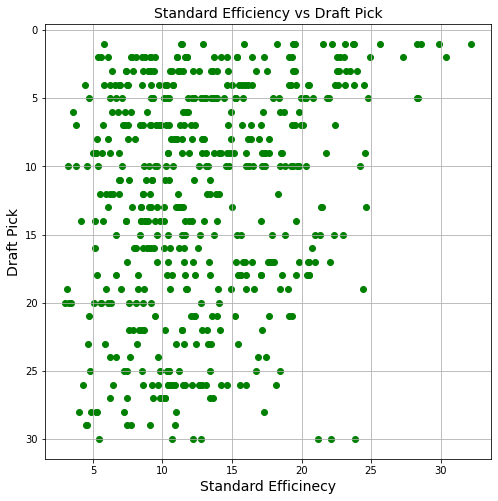

In [ ]:

"""
Standard Efficiency
"""
import sklearn
from sklearn import linear_model

Y = df_ML['draft_pick']
X = df_ML['st_eff']

regr = linear_model.LinearRegression()
X = X.values.reshape(-1, 1)
regr.fit(X, Y)


print('Coefficients: \n', -100 * regr.coef_)

plt.figure(figsize=(8, 8))
plt.scatter(df_ML['st_eff'], df_ML['draft_pick'], color='green')

plt.title('Standard Efficiency vs Draft Pick', fontsize=14)
plt.xlabel('Standard Efficinecy', fontsize=14)
plt.ylabel('Draft Pick', fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis() #Ordering the draft pick in the desired formation

plt.show()

Coefficients: 
 [10.68873967]


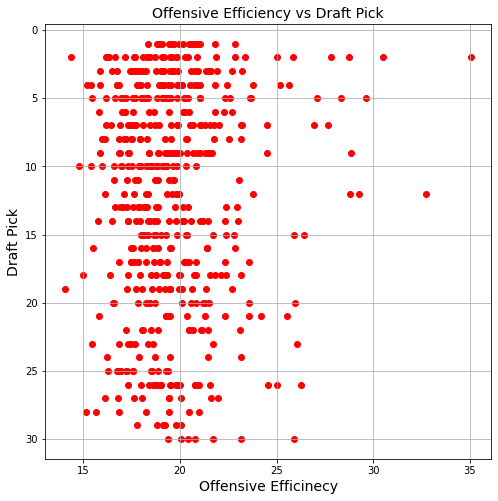

In [ ]:
"""
Offensive Efificiency
"""

Y = df_ML['draft_pick']
X = df_ML['off_eff']

regr = linear_model.LinearRegression()
X = X.values.reshape(-1, 1)
regr.fit(X, Y)


print('Coefficients: \n', -100 * regr.coef_)

plt.figure(figsize=(8, 8))
plt.scatter(df_ML['off_eff'], df_ML['draft_pick'], color='red')


plt.title('Offensive Efficiency vs Draft Pick', fontsize=14)
plt.xlabel('Offensive Efficinecy', fontsize=14)
plt.ylabel('Draft Pick', fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis() #Ordering the draft pick in the desired formation
plt.show()


In [ ]:
dataTypeSeries = df_ML.dtypes
filteredColumns = df_ML.dtypes[df_ML.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_ML=df_ML.copy()

rf_ML.drop("Player",axis=1,inplace=True)
rf_ML.drop("st_eff",axis=1,inplace=True)

y = rf_ML['draft_pick']
X = rf_ML['off_eff']

X = X.values.reshape(-1, 1)

X_train,X_test_val,y_train,y_test_val = train_test_split(X,y,test_size = 0.5,random_state = 1)


rf_ML = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
rf_ML.fit(X_train, y_train)

rand_for_predict = rf_ML.predict(X_test_val)
rf_acc = accuracy_score(y_test_val, rand_for_predict)

print(rf_ML.fit(X_train, y_train))
print()
print("Random Forest Validation Set Accuracy:"+str(rf_acc))


In [ ]:
from matplotlib import cm


feature_list = list(rf_ML)
importances = list(rf_ML.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

fig, ax = plt.subplots(figsize=(15, 8))
index=np.argsort(importances)
arr_sorted=[]
dummy_list=[]

for i in index:
  arr_sorted.append(importances[i])
  dummy_list.append(feature_list[i])

dummy_list=dummy_list[-10:]
arr_sorted=arr_sorted[-10:]


ax.barh(dummy_list,arr_sorted, color=cm.Reds(np.linspace(0,1,25)))

plt.title("Most Important 25 Features of The Inital Model")
plt.xlabel("Feature Importance")
plt.grid(True)
plt.show()